## Week4: Deployment on Flask

Task:

1. Select any toy data (simple data).

2. Save the model

3. Deploy the model on flask ( web app)

4. Create pdf document (Name, Batch code, Submission date, Submitted to ) which should contain snapshot of each step of deployment)

5. Upload the document to Github

6. Submit the URL of the uploaded document.

In [1]:
# !pip install scikit-learn==1.5.1

In [2]:
# Import Libraries
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import gdown

In [3]:
print(sklearn.__version__)

1.5.1


In [4]:
#importing the dataset from drive
gdown.download_folder('https://drive.google.com/drive/folders/1Akoln8Xc14yMxO1AXQw88YddMFyrfEft?', quiet=True)

['/content/Iris-Dataset/iris.csv']

In [5]:
#Load the dataset
iris_data = pd.read_csv('/content/Iris-Dataset/iris.csv')

In [6]:
iris_data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris_data.shape


(150, 5)

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# check fo null vallues
iris_data.isnull().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Class,0


In [10]:
# Check for duplicates
num_duplicates = iris_data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1


In [11]:
# Identify duplicate records
duplicates = iris_data[iris_data.duplicated()]

# Print duplicate records
print("Duplicate records:")
print(duplicates)

Duplicate records:
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Class
142           5.8          2.7           5.1          1.9  Virginica


Note:
In the excel sheet, the duplicated data is aligned in the 103 and 144 row.
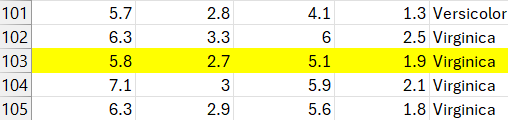

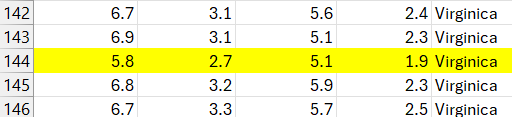

In [12]:
# Remove duplicate rows
iris_data = iris_data.drop_duplicates()

# Verify that duplicates are removed
num_duplicates_after = iris_data.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {num_duplicates_after}")


Number of duplicate rows after cleaning: 0


In [13]:
iris_data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# Select independent and dependent variable
# Split the data into features and target
X = iris_data[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]
y = iris_data["Class"]


In [15]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train the model with Randon forest classifier
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
#Evaluate the model
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Randon Forest Model Accuracy:', accuracy)

Randon Forest Model Accuracy: 1.0


In [18]:
# Train the model with logistic regression
lg= LogisticRegression(max_iter=200)

# Fit the model
lg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [19]:
# Evaluate the model
y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Model Accuracy:', accuracy)

Logistic Regression Model Accuracy: 1.0


In [20]:
from sklearn.metrics import classification_report

# Evaluate Random Forest
y_pred_rf = rfc.predict(X_test)
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))

# Evaluate Logistic Regression
y_pred_lg = lg.predict(X_test)
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_lg))


Random Forest Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Conclusion:**

When both models achieve an accuracy of 1 on the test data, it might indicates that the models are overfitting, especially if your dataset is small or lacks complexity. Overfitting occurs when a model learns the training data too well, including noise and outliers, leading to poor generalization on unseen data.

**Cross-Validation:** To ensure that your models are truly generalizing well, we should use cross-validation. This involves splitting the dataset into multiple folds and training/evaluating the model on different folds. This process helps in assessing how the model performs across different subsets of the data.

In [21]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)
print('Random Forest Cross-Validation Scores:', rf_cv_scores)
print('Random Forest Mean CV Score:', rf_cv_scores.mean())

# Cross-validation for Logistic Regression
lg_cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
print('Logistic Regression Cross-Validation Scores:', lg_cv_scores)
print('Logistic Regression Mean CV Score:', lg_cv_scores.mean())


Random Forest Cross-Validation Scores: [1.         0.95833333 0.875      1.         0.95652174]
Random Forest Mean CV Score: 0.9579710144927537
Logistic Regression Cross-Validation Scores: [1.         0.91666667 0.875      1.         0.95652174]
Logistic Regression Mean CV Score: 0.9496376811594203


**Choosing the model Random Forest:**

*   Handle Non- linearity
*   Robustness to Outliers
*   Handle large datasets and Complex Patterns








In [22]:
# Choosing the model
# Make pickle file of our model
pickle.dump(rfc, open("model.pkl", "wb"))